## **IMPORT DATASET**

In [ ]:
import pandas as pd

# Membaca dataset dari file CSV, memastikan None tidak diubah menjadi NaN
dataset = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv", keep_default_na=False)

# Menampilkan beberapa baris pertama untuk memeriksa hasilnya
print(dataset.head())

# Menampilkan nilai unik dalam kolom 'Sleep Disorder' untuk memastikan ada tiga kategori
print("Kategori unik dalam kolom 'Sleep Disorder':", dataset['Sleep Disorder'].unique())


   Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
0         126/83          77         4200           None  
1         125/80          75      

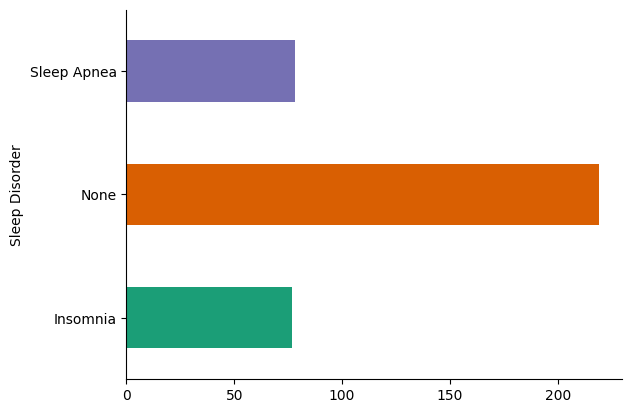

In [ ]:
# @title Sleep Disorder

from matplotlib import pyplot as plt
import seaborn as sns
dataset.groupby('Sleep Disorder').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
dataset.shape

(374, 13)

## **PEMBERSIHAN DATA/HAPUS KOLOM**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

# df = pd.DataFrame(dataset)

# Cek nilai hilang pada tiap kolom
kolom_nilai_hilang = ['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
                      'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
                      'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
                      'Sleep Disorder']

# Inisialisasi imputer data kategorikal
categorical_imputer = SimpleImputer(strategy='most_frequent')
dataset[kolom_nilai_hilang] = categorical_imputer.fit_transform(dataset[kolom_nilai_hilang])

# Hapus atau Drop kolom yang tidak dibutuhkan
columns_to_drop = ['Person ID', 'Quality of Sleep', 'Stress Level', 'Blood Pressure',
                   'Heart Rate', 'Daily Steps']
dataset = dataset.drop(columns=columns_to_drop, errors='ignore')

print(dataset.head())

  Gender Age            Occupation Sleep Duration Physical Activity Level  \
0   Male  27     Software Engineer            6.1                      42   
1   Male  28                Doctor            6.2                      60   
2   Male  28                Doctor            6.2                      60   
3   Male  28  Sales Representative            5.9                      30   
4   Male  28  Sales Representative            5.9                      30   

  BMI Category Sleep Disorder  
0   Overweight           None  
1       Normal           None  
2       Normal           None  
3        Obese    Sleep Apnea  
4        Obese    Sleep Apnea  


## **TRANSFORMASI DATA**

In [ ]:
# Tahap Transformasi Data (LabelEncoder)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
dataset['Gender'] = label_encoder.fit_transform(dataset['Gender'])
dataset['Occupation'] = label_encoder.fit_transform(dataset['Occupation'])
dataset['BMI Category'] = label_encoder.fit_transform(dataset['BMI Category'])
dataset['Sleep Disorder'] = label_encoder.fit_transform(dataset['Sleep Disorder'])

print(dataset.head(5))

   Gender Age  Occupation Sleep Duration Physical Activity Level  \
0       1  27           9            6.1                      42   
1       1  28           1            6.2                      60   
2       1  28           1            6.2                      60   
3       1  28           6            5.9                      30   
4       1  28           6            5.9                      30   

   BMI Category  Sleep Disorder  
0             3               1  
1             0               1  
2             0               1  
3             2               2  
4             2               2  


# **DEKLARASI VEKTOR FITUR DAN VARIABEL TARGET**

In [ ]:
X = dataset.iloc[:, 0:6]
y = dataset.iloc[:, 6]

## **PEMBAGIAN DAN NORMALISASI DATA**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Pembagian data 80% untuk pelatihan dan 20% untuk pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Fit dan transformasi data pelatihan
X_train_scaled = scaler.fit_transform(X_train)

# Transformasi data pengujian dengan scaler yang sama
X_test_scaled = scaler.fit_transform(X_test)

# Hasil keluaran
print("Data Pelatihan (sebelum scaling):", X_train.shape)
print("Data Pelatihan (setelah scaling):", X_train_scaled.shape)
print("\nData Pengujian (sebelum scaling):", X_test.shape)
print("Data Pengujian (setelah scaling):", X_test_scaled.shape)

Data Pelatihan (sebelum scaling): (299, 6)
Data Pelatihan (setelah scaling): (299, 6)

Data Pengujian (sebelum scaling): (75, 6)
Data Pengujian (setelah scaling): (75, 6)


# **EXPLORATORY DATA**

In [ ]:
dataset.info()
print("")
dataset.isnull().sum()

In [ ]:
print(X_train.columns)

Index(['Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Physical Activity Level', 'BMI Category'],
      dtype='object')


### Menampilkan Data Hasil Preprocessing

In [ ]:
import pandas as pd
from IPython.display import display

# Mengatur pandas untuk menampilkan lebih banyak baris dan kolom
pd.set_option('display.max_rows', None)  # Menampilkan semua baris
pd.set_option('display.max_columns', None)  # Menampilkan semua kolom

display(X_train)

,Gender,Age,Occupation,Sleep Duration,Physical Activity Level,BMI Category
192,1,43,7,6.5,45,3
75,1,33,1,6.0,30,0
84,1,35,9,7.5,60,1
362,0,59,5,8.2,75,3
16,0,29,5,6.5,40,1
66,1,32,0,7.2,50,1
283,0,50,5,6.0,90,3
7,1,29,1,7.8,75,0
113,1,37,3,7.4,60,0
116,0,37,0,7.2,60,0


### Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import SVC
from sklearn import metrics
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#### GridsearchCV

In [ ]:
# Model SVM dengan Kenel RBF
svc = SVC(kernel='rbf')

# Deklarasi nilai parameter grid C dan Gamma
parameters = {'kernel' : ['rbf'], 'C': [1.0, 10.0, 100.0, 1000.0],
            'gamma': [0.01, 0.1, 1.0]}
# K-Fold CV K=5
kf = KFold (n_splits=5, shuffle=True, random_state=42)

# GridSearch
clf = GridSearchCV(estimator = svc, param_grid = parameters, cv = kf)
clf.fit(X_train_scaled, y_train)   # X_train,y_train

# Hasil rangkuman
print("Nilai C terbaik: ", clf.best_params_['C'])
print("Nilai gamma terbaik: ", clf.best_params_['gamma'])
print("Best Score: %f using %s" % (clf.best_score_, clf.best_params_))

Nilai C terbaik:  100.0
Nilai gamma terbaik:  0.1
Best Score: 0.926328 using {'C': 100.0, 'gamma': 0.1, 'kernel': 'rbf'}


### Penerapan SVM

In [ ]:
# Membuat model SVM terhadap Training set
classifier = SVC(kernel = 'rbf', random_state=0, C=10.0, gamma=1.0)
classifier_ovr = OneVsOneClassifier (classifier)
classifier.fit(X_train_scaled, y_train)
y_pred = classifier.predict(X_test_scaled)
print("Hasil Akurasi :", metrics.accuracy_score(y_test, y_pred))

Hasil Akurasi : 0.9066666666666666


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

X_test_scaled
y_test

# Melakukan prediksi menggunakan model SVM
y_pred = classifier.predict(X_test_scaled)

# Menghasilkan confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Menampilkan bar chart
labels = ['Insomnia', 'None', 'Sleep Apnea']
width = 0.35

fig, ax = plt.subplots()
bar_berhasil = ax.bar(np.arange(len(labels)), np.diag(cm), width, label='Berhasil', color='green')
bar_gagal = ax.bar(np.arange(len(labels)) + width, np.sum(cm, axis=1) - np.diag(cm), width, label='Gagal', color='red')

ax.set_xlabel('Kelas (Sleep Disorder)')
ax.set_ylabel('Jumlah Kasus/Data')
ax.set_title('Hasil Prediksi SVM')
ax.set_xticks(np.arange(len(labels)) + width / 2)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bar_berhasil)
autolabel(bar_gagal)

plt.show()

### CONFUSION MATRIX SVM

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[13  3]
 [ 4 55]]


In [ ]:
import seaborn as sns
# Menghasilkan confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Menampilkan bar chart untuk SVM
labels = ['Insomnia', 'None', 'Sleep Apnea']
width = 0.35

ax.set_xlabel('Kategori')
ax.set_ylabel('Jumlah Kasus')
ax.set_title('Hasil SVM')
ax.set_xticks(np.arange(len(labels)) + width / 2)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bar_berhasil)
autolabel(bar_gagal)

# Menampilkan confusion matrix menggunakan heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Nilai akurasi
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy:.2f}")

# Nilai precision
precision = metrics.precision_score(y_test, y_pred, average='macro')
print(f"Presisi: {precision:.2f}")

# Nilai recall
recall = metrics.recall_score(y_test, y_pred, average='macro')
print(f"Recall: {recall:.2f}")

# Hasil
print(classification_report(y_test, y_pred))

Akurasi: 0.91
Presisi: 0.86
Recall: 0.87
              precision    recall  f1-score   support

           0       0.76      0.81      0.79        16
           1       0.95      0.93      0.94        59

    accuracy                           0.91        75
   macro avg       0.86      0.87      0.86        75
weighted avg       0.91      0.91      0.91        75



## **KNN**

### K-FOLD CV MENENTUKAN NILAI K

In [ ]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np

X_test_scaled

# Jumlah split/iterasi untuk K-Fold CV
n_splits = 10

# Inisialisasi objek KFold
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Inisialisasi model dari KNN
knn_classifier = KNeighborsClassifier()

# List menyimpan rata-rata akurasi tiap iterasi K-Fold
average_accuracy_list = []

# Nilai K yang ingin diuji
k_values = range(1, 61)

# Iterasi melalui setiap nilai K
for k in k_values:
    knn_classifier.n_neighbors = k

    # List untuk menyimpan akurasi pada setiap iterasi K-Fold
    accuracy_list = []

    # Iterasi melalui setiap split K-Fold
    for train_index, test_index in kf.split(X):
        # Bagi data menjadi set pelatihan dan pengujian
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Latih model KNN
        knn_classifier.fit(X_train, y_train)

        # Lakukan prediksi
        y_pred = knn_classifier.predict(X_test)

        # Hitung akurasi dan tambahkan ke list
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_list.append(accuracy)

    # Hitung rata-rata akurasi untuk nilai K saat ini
    average_accuracy = np.mean(accuracy_list)

    # Tambahkan rata-rata akurasi ke list
    average_accuracy_list.append(average_accuracy)

    # Cetak nilai K dan rata-rata akurasi
    print(f"K = {k}, Rata-rata Akurasi: {average_accuracy:.2f}")

# Temukan nilai K terbaik berdasarkan rata-rata akurasi tertinggi
best_k = k_values[np.argmax(average_accuracy_list)]
print(f"Nilai K terbaik: {best_k}")

In [ ]:
import matplotlib.pyplot as plt

# Visualisasi line chart
plt.figure(figsize=(17, 6))
plt.plot(k_values, average_accuracy_list, marker='o', linestyle='-', color='b')
plt.title('Rata-rata Akurasi untuk Setiap Nilai K')
plt.xlabel('Nilai K')
plt.ylabel('Rata-rata Akurasi')
plt.xticks(k_values)
plt.grid(True)
plt.show()

### PENERAPAN KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np

# Membuat model KNN terhadap Training set
classifier_knn = KNeighborsClassifier(n_neighbors=52)

# Melatih model menggunakan data pelatihan
classifier_knn.fit(X_train, y_train)

# Menggunakan model untuk membuat prediksi pada data pengujian
y_pred_knn = classifier_knn.predict(X_test)

# Menghasilkan confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Menampilkan bar chart untuk KNN
labels = ['Insomnia', 'None', 'Sleep Apnea']
width = 0.35

fig, ax = plt.subplots()
bar_berhasil_knn = ax.bar(np.arange(len(labels)), np.diag(cm_knn), width, label='Berhasil', color='green')
bar_gagal_knn = ax.bar(np.arange(len(labels)) + width, np.sum(cm_knn, axis=1) - np.diag(cm_knn), width, label='Gagal', color='red')

ax.set_xlabel('Kategori')
ax.set_ylabel('Jumlah Kasus')
ax.set_title('Hasil KNN')
ax.set_xticks(np.arange(len(labels)) + width / 2)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bar_berhasil_knn)
autolabel(bar_gagal_knn)

plt.show()

### CONFUSION MATRIX KNN

In [ ]:
from sklearn.metrics import confusion_matrix

cm_knn = confusion_matrix(y_test, y_pred_knn)
print(cm_knn)

[[ 8  0]
 [ 2 27]]


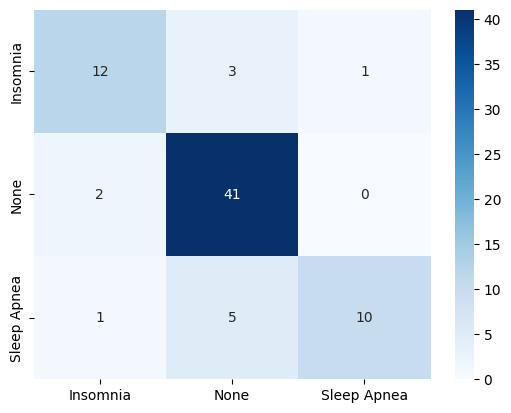

In [ ]:
# Menghasilkan confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Menampilkan bar chart untuk KNN
labels = ['Insomnia', 'None', 'Sleep Apnea']
width = 0.35

ax.set_xlabel('Kategori')
ax.set_ylabel('Jumlah Kasus')
ax.set_title('Hasil KNN')
ax.set_xticks(np.arange(len(labels)) + width / 2)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bar_berhasil_knn)
autolabel(bar_gagal_knn)

# Menampilkan confusion matrix menggunakan heatmap
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Nilai akurasi
accuracy = metrics.accuracy_score(y_test, y_pred_knn)
print(f"Akurasi: {accuracy:.2f}")

# Nilai precision
precision = metrics.precision_score(y_test, y_pred_knn, average='macro')
print(f"Presisi: {precision:.2f}")

# Nilai recall
recall = metrics.recall_score(y_test, y_pred_knn, average='macro')
print(f"Recall: {recall:.2f}")

# Hasil
print(classification_report(y_test, y_pred_knn))

Akurasi: 0.84
Presisi: 0.85
Recall: 0.78
              precision    recall  f1-score   support

           0       0.80      0.75      0.77        16
           1       0.84      0.95      0.89        43
           2       0.91      0.62      0.74        16

    accuracy                           0.84        75
   macro avg       0.85      0.78      0.80        75
weighted avg       0.84      0.84      0.83        75

